In [6]:
import cv2

In [75]:

def genrate_dataset():
    face_classifier=cv2.CascadeClassifier("haarcascade_frontalface_alt.xml");
    def face_cropper(img):
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces=face_classifier.detectMultiScale(gray,1.3,5)

        if faces is ():
            return None
        for (x,y,w,h) in faces:
            cropped_Face=img[y:y+h,x:x+w]
        return cropped_Face
    cap=cv2.VideoCapture(0)
    img_id=1

    while True:
        ret,Fram=cap.read()
        if face_cropper(Fram) is not    None:
            img_id+=1
            face=cv2.resize(face_cropper(Fram),(200,200))
            face=cv2.cvtColor(face,cv2.COLOR_BGR2GRAY)
            file_name_path="data/"+"second."+str(img_id)+".jpg"
            #file_name_path="Visulaization/"+str(img_id)+'.jpg'
            cv2.imwrite(file_name_path,face)
            cv2.putText(face,str(img_id),(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)

            cv2.imshow("CroppedFace",face)
            if cv2.waitKey(1)==13 or int(img_id)==1000:
                break
    
    cap.release()
    cv2.destroyAllWindows()
    print("Collection samples is completed")

genrate_dataset()



<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\acer\AppData\Local\Temp\ipykernel_17704\3164684681.py:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


Collection samples is completed


In [88]:
def capturePhoto():
    face_classifier=cv2.CascadeClassifier("haarcascade_frontalface_alt.xml");
    def face_cropper(img):
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces=face_classifier.detectMultiScale(gray,1.3,5)

        if faces is ():
            return None
        for (x,y,w,h) in faces:
            cropped_Face=img[y:y+h,x:x+w]
        return cropped_Face
    cap=cv2.VideoCapture(0)
    img_id=1

    while True:
        ret,Fram=cap.read()
        if face_cropper(Fram) is not None:
            img_id+=1
            face=cv2.resize(face_cropper(Fram),(200,200))
            face=cv2.cvtColor(face,cv2.COLOR_BGR2GRAY)
            #file_name_path="data/"+"first."+str(img_id)+".jpg"
            file_name_path="Visulaization/"+str(img_id)+'.jpg'
            cv2.imwrite(file_name_path,face)
            cv2.putText(face,str(img_id),(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)

            cv2.imshow("CroppedFace",face)
            if cv2.waitKey(1)==13 or int(img_id)==2:
                break
    
    cap.release()
    cv2.destroyAllWindows()
    print("Collection samples is completed")
capturePhoto()        


<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\acer\AppData\Local\Temp\ipykernel_17704\88685276.py:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


Collection samples is completed


In [3]:
##CREATE LABEL

In [92]:
import numpy as np
def my_label(image_name):
    name=image_name.split('.')[-3]

    if name=="first":
        return np.array([1,0,0])
    elif name=="second":
        return np.array([0,1,0])
    elif name=="third":
        return np.array([0,0,1])

In [93]:
import os 
from random import shuffle
from tqdm import tqdm

In [94]:
def my_data():
    data=[]

    for img in tqdm(os.listdir("data")):
        path=os.path.join("data",img)
        img_data=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img_data=cv2.resize(img_data,(50,50))
        data.append([np.array(img_data),my_label(img)])
    shuffle(data)
    return data

In [95]:
data=my_data()


100%|██████████| 1998/1998 [00:00<00:00, 2338.34it/s]


In [96]:
train=data[:700]
test=data[700:]
X_train=np.array([i[0] for i in train]).reshape(-1,50,50,1)
print(X_train.shape)

Y_train=[i[1] for i in train]
X_test=np.array([i[0] for i in test]).reshape(-1,50,50,1)

print(X_test.shape)
Y_test=[i[1] for i in train]

(700, 50, 50, 1)
(1298, 50, 50, 1)


In [97]:
import tensorflow as tf
import tflearn 
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data,dropout,fully_connected
from tflearn.layers.estimator import regression

In [98]:
tf.compat.v1.reset_default_graph()
convnet = input_data(shape=[50,50,1])
convnet = conv_2d(convnet, 32, 5, activation='relu')
# 32 filters and stride=5 so that the filter will move 5 pixel or unit at a time
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)
convnet = fully_connected(convnet, 3, activation='softmax') #2 for two dataset
convnet = regression(convnet, optimizer='adam', learning_rate = 0.001, loss='categorical_crossentropy')
model = tflearn.DNN(convnet, tensorboard_verbose=1)
model.fit(X_train, Y_train, n_epoch=12, validation_set=(X_test, Y_test), show_metric = True, run_id="FRS" )


Training Step: 131  | total loss: 0.29161 | time: 0.928s
| Adam | epoch: 012 | loss: 0.29161 - acc: 0.9713 -- iter: 640/700


Exception in thread Thread-196 (fill_feed_dict_queue):
Traceback (most recent call last):
  File "c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1009, in _bootstrap_inner
    self.run()
  File "c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\threading.py", line 946, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\tflearn\data_flow.py", line 187, in fill_feed_dict_queue
    data = self.retrieve_data(batch_ids)
  File "c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\tflearn\data_flow.py", line 222, in retrieve_data
    utils.slice_array(self.feed_dict[key], batch_ids)
  File "c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\tflearn\utils.py", line 204, in slice_array
    return X[start]
IndexError: index 700 is out of bounds for axis 0 with size 700


Training Step: 132  | total loss: 0.26337 | time: 2.017s
| Adam | epoch: 012 | loss: 0.26337 - acc: 0.9742 | val_loss: 1.14137 - val_acc: 0.2558 -- iter: 700/700
--


In [100]:
def data_for_visulization():
    Vdata=[]
    for img in tqdm(os.listdir("Visulaization")):
        path=os.path.join("Visulaization",img)
        img_num=img.split('.')[0]
        img_data=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img_data=cv2.resize(img_data,(50,50))
        Vdata.append([np.array(img_data),img_num])
    shuffle(Vdata)
    return Vdata

In [101]:
Vdata=data_for_visulization()

100%|██████████| 1/1 [00:00<00:00, 999.60it/s]


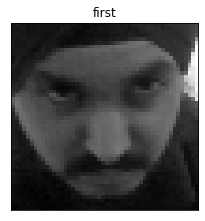

In [102]:
import matplotlib.pyplot as plt   # pip install matplotlib

fig = plt.figure(figsize=(20,20))
for num, data in enumerate(Vdata[:20]):
    img_data = data[0]
    y = fig.add_subplot(5,5, num+1)
    image = img_data
    data = img_data.reshape(50,50,1)
    model_out = model.predict([data])[0]
    label=False
    if np.argmax(model_out) == 0:
        my_label = 'first'
        label=True
    elif np.argmax(model_out) == 1:
        my_label = 'second'
        label=False
    elif np.argmax(model_out) == 2:
        my_label = 'None'
        label=False
    else:
        my_label='none'
        label=False
        
    y.imshow(image, cmap='gray')
    plt.title(my_label)
    
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [103]:

import tkinter as tk
from tkinter import ttk

In [104]:
root=tk.Tk()
root.geometry('400x250')
userString=tk.StringVar(root)
passString=tk.StringVar(root)

In [105]:
def Login():
    label_1=tk.Label(root,text="Username").place(x = 60, y =50)
    inpUser=tk.Entry(root,width=30,textvariable=userString).place(x = 130, y = 50)

    label_2=tk.Label(root,text="Password").place(x = 60, y = 90)
    inpPass=tk.Entry(root,width=30,textvariable=passString,show="*").place(x = 130, y = 90)

    Button=tk.Button(root,text="Submit",command=getValues).place(x = 170, y = 120)

In [106]:
def getValues():
    userVal=userString.get()
    passVal=passString.get()

    if(userVal.rstrip()=='hello' and passVal.rstrip()=='world'):
        print("Login Sucess")

        for i in root.winfo_children():
            i.destroy()
    
        main_menu()
        
    else:
        print("Failed")

In [107]:
clicked = tk.StringVar()
button_var = tk.StringVar()
button_var.set("Disable")
def disable_func():
    if (str(button_var.get()) == 'Disable'):
        button_var.set("Enable")
    elif (str(button_var.get()) == 'Enable'):
        button_var.set("Disable")

def genrate_dataset():
    pass

def getvall():
    print(str(clicked.get()).split(' ')[0])

def main_menu():    
    # clicked.set('5 mins')
    
    label_1=tk.Label(root,text="Interval", anchor=tk.W).place(x = 20, y =20)
    options = ttk.Combobox(root, textvariable = clicked)
    options['values'] = tuple(f'{i} mins' for i in range(5, 30 + 1, 5))
    options['state'] = 'readonly'
    options.place(x = 80, y = 19)

    button=tk.Button(root,text="Select",command=getvall, width=10).place(x = 80, y = 45)


    label_2=tk.Label(root,text="Add user", anchor=tk.W).place(x = 20, y = 90)
    button=tk.Button(root,text="Add",command=genrate_dataset, width=10).place(x = 80, y = 90)

    disable=tk.Label(root,text="Disable IR", anchor=tk.W).place(x = 20, y = 130)
    disable_button=tk.Button(root,command=disable_func, textvariable=button_var, width=10).place(x = 80, y = 130)

In [108]:
Login()

In [109]:
root.mainloop()

Login Sucess
